In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat
from scipy import signal

#custom made functions
import utils
import functions as fn


 ### Run the model for Figs 2a and 2b

In [2]:
#Get w0, w1
cm = 1.0; N = 129; sf0 = 4/N; theta = 0; phase = 0.0; std = 1/(8*sf0) 

w0 = fn.getGabor(cm,sf0,theta,N,phase,std)
A = np.sum(np.absolute(w0));w0 = w0/A

w1 = fn.getGabor(cm,sf0,theta,N,phase+np.pi/2,3*std)
Aw = np.sum(np.absolute(w1));w1 = w1/Aw

####################

lamdas=[0,1,2,4,6,8,10,20]
alpha = 0.2; pa2m = 0.5; sf = sf0; lr = 0.1; minIterations = 20

#different orientations and phases of stimuli tested
step = np.pi/18; 
orientations = np.arange(-np.pi/2,np.pi/2+step,step); phases = np.arange(-np.pi/2,np.pi/2+step,step)

for lamda in lamdas:
    print(f'start processing for lamda = {lamda}')
    JAll = {}
    for indPhase, ph in enumerate(phases):
        JOri = np.zeros(len(orientations))
        for indOri, ori in enumerate(orientations):
    
            stim = fn.getGabor(cm,sf,ori,N,ph,std)
            JOri[indOri],_,_ = fn.feedforwardModel(stim,w0,w1,lamda,lr,alpha,pa2m)
            
        JAll[indPhase] = JOri
            
    fileSave = 'data/_1Simple2ComplexStimPa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(alpha)+'.pckl'
    utils.saveVar((orientations,phases,JAll),fileSave)

start processing for lamda = 0
start processing for lamda = 1
start processing for lamda = 2
start processing for lamda = 4
start processing for lamda = 6
start processing for lamda = 8
start processing for lamda = 10
start processing for lamda = 20


 ### Run the model for Fig 2c

In [3]:
#Get w0, w1
cm = 1.0; N = 129; sf0 = 4/N; theta = 0; phase = 0.0; std = 1/(8*sf0) 

w0 = fn.getGabor(cm,sf0,theta,N,phase,std)
A = np.sum(np.absolute(w0));w0 = w0/A

w1 = fn.getGabor(cm,sf0,theta,N,phase+np.pi/2,3*std)
Aw = np.sum(np.absolute(w1));w1 = w1/Aw

################

alphas = [0,0.1,0.2,0.3,0.4,0.5]

lamda=10; pa2m = 0.5; sf = sf0; lr = 0.1; minIterations = 20


#different orientations and phases of stimuli tested
step = np.pi/18; 
orientations = np.arange(-np.pi/2,np.pi/2+step,step); phases = np.arange(-np.pi/2,np.pi/2+step,step)

for alpha in alphas:
    print(f'start processing for alpha = {alpha}')
    JAll = {}
    for indPhase, ph in enumerate(phases):
        JOri = np.zeros(len(orientations))
        for indOri, ori in enumerate(orientations):
    
            stim = fn.getGabor(cm,sf,ori,N,ph,std)
            JOri[indOri],_,_ = fn.feedforwardModel(stim,w0,w1,lamda,lr,alpha,pa2m)
            
        JAll[indPhase] = JOri
            
    fileSave = 'data/_1Simple2ComplexStimPa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(alpha)+'.pckl'
    utils.saveVar((orientations,phases,JAll),fileSave)

start processing for alpha = 0
start processing for alpha = 0.1
start processing for alpha = 0.2
start processing for alpha = 0.3
start processing for alpha = 0.4
start processing for alpha = 0.5


### Run the model for Fig 2d

In [4]:
#Get w0, w1
cm = 1.0; N = 129; sf0 = 4/N; theta = 0; phase = 0.0; std = 1/(8*sf0) 

w0 = fn.getGabor(cm,sf0,theta,N,phase,std)
A = np.sum(np.absolute(w0));w0 = w0/A

w1 = fn.getGabor(cm,sf0,theta,N,phase+np.pi/2,3*std)
Aw = np.sum(np.absolute(w1));w1 = w1/Aw

##################

lamdas = 2**np.linspace(1,10,37)
alphas = np.linspace(0,0.8,33)

pa2m = 0.5; sf = sf0; lr = 0.1; minIterations = 20

ori = 0
step = np.pi/18
phases = np.arange(-np.pi/2,np.pi/2+step,step)

stimDict={}
for ph in phases:
    stimDict[ph] = fn.getGabor(cm,sf,ori,N,ph,std)

J3D = np.zeros((len(lamdas),len(alphas),len(phases)))
for indL,lamda in enumerate(lamdas):
    for indA,alpha in enumerate(alphas):
        for indPh,ph in enumerate(phases):

            J3D[indL,indA,indPh],_,_ = fn.feedforwardModel(stimDict[ph],w0,w1,lamda,lr,alpha,pa2m)
            
            
fileSave = 'data/_1Simple2ComplexModulationDepthPa2m'+str(pa2m)+'.pckl'
utils.saveVar((lamdas,alphas,phases,J3D),fileSave)


### Run the model for Supplementary Fig 4

In [5]:
#Get w0, w1
cm = 1.0; N = 129; sf0 = 4/N; theta = 0; phase = 0.0; std = 1/(8*sf0) 

w0 = fn.getGabor(cm,12*sf0,theta,N,phase,std/2)
A = np.sum(np.absolute(w0));w0 = w0/A

w1 = fn.getGabor(cm,sf0,theta,N,phase+np.pi/2,3*std)
Aw = np.sum(np.absolute(w1));w1 = w1/Aw

#Do the convolutions
step = np.pi/18
orientations = np.arange(-np.pi/2,np.pi/2+step,step) #orientation of Gabor in radians
phases = np.arange(-np.pi/2,np.pi/2+step,step)
sf = sf0
#precompute the convoluted stim with w0 to save time.
stimConvPhi = {}
print('precompute convolutions')
for indPhase,ph in enumerate(phases):
    for inOri,ori in enumerate(orientations):
        stimTemp = fn.getGabor(1,sf,ori,N,ph,std)
        stimConvPhi[ph,ori] =signal.convolve2d(stimTemp, w0, boundary='fill', mode='same')

fileSave = 'data/_1HierarchicalConvolutedStim.pckl'
utils.saveVar(stimConvPhi,fileSave)





precompute convolutions


In [6]:
fileLoad = 'data/_1HierarchicalConvolutedStim.pckl'
(stimConvPhi) = utils.loadVar(fileLoad)

lamda = 10; alpha = 0.2; pa2m = 0.5; sf = sf0; lr = 0.1; minIterations = 20

#DIFFERENT ORIENTATIONS
step = np.pi/18
orientations = np.arange(-np.pi/2,np.pi/2+step,step) #orientation of Gabor in radians
phases = np.arange(-np.pi/2,np.pi/2+step,step)

JAll = {}
for indPhase, ph in enumerate(phases):
    JOri = np.zeros(len(orientations))
    for indOri, ori in enumerate(orientations):
        JOri[indOri],_,_ = fn.feedforwardModel(stimConvPhi[ph,ori],w0,w1,lamda,lr,alpha,pa2m)
            
    JAll[indPhase] = JOri
            
fileSave = 'data/_1HierarchicalStimPa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(alpha)+'.pckl'
utils.saveVar((orientations,phases,JAll),fileSave)

### Run the model for Fig 3

In [7]:
#for Fig 3a


#Get w0, w1
cm = 1.0; N = 129; sf0 = 4/N; theta = 0; phase = 0.0; std = 1/(8*sf0) 

w0 = fn.getGabor(cm,sf0,theta,N,phase,std/2)
A = np.sum(np.absolute(w0));w0 = w0/A

w1 = 1.0*np.ones((N,N))
Aw = np.sum(np.absolute(w1));w1 = w1/Aw

partString = 'nonorientedFilter'

JAll = {}
for indPhase, ph in enumerate(phases):
    JOri = np.zeros(len(orientations))
    for indOri, ori in enumerate(orientations):
    
        stim = fn.getGabor(cm,sf,ori,N,ph,std)
        JOri[indOri],_,_ = fn.feedforwardModel(stim,w0,w1,lamda,lr,alpha,pa2m)
            
    JAll[indPhase] = JOri
            
fileSave = 'data/_1Simple2Complex'+partString+'StimPa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(alpha)+'.pckl'
utils.saveVar((orientations,phases,JAll),fileSave)

In [8]:
#for Figs 3b and 3c

#Get w0, w1
cm = 1.0; N = 129; sf0 = 4/N; theta = 0; phase = 0.0; std = 1/(8*sf0) 

w0 = fn.getGabor(cm,sf0,theta,N,phase,std/2)
A = np.sum(np.absolute(w0));w0 = w0/A

w1 = fn.getGabor(cm,sf0,theta,N,phase+np.pi/2,3*std)
Aw = np.sum(np.absolute(w1));w1 = w1/Aw

#########################
alphas = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
lamda=10; pa2m = 0.5; sf = sf0; lr = 0.1; minIterations = 20

flagNonlin = 1;partString = 'sigmoid' 

for alpha in alphas:
    print(f'we start alpha = {alpha}')
    JAll = {}
    for indPhase, ph in enumerate(phases):
        JOri = np.zeros(len(orientations))
        for indOri, ori in enumerate(orientations):
    
            stim = fn.getGabor(cm,sf,ori,N,ph,std)
            JOri[indOri],_,_ = fn.feedforwardModel(stim,w0,w1,lamda,lr,alpha,pa2m,flagNonlin)
            
        JAll[indPhase] = JOri
            
    fileSave = 'data/_1Simple2Complex'+partString+'StimPa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(alpha)+'.pckl'
    utils.saveVar((orientations,phases,JAll),fileSave)    



we start alpha = 0.0
we start alpha = 0.1
we start alpha = 0.2
we start alpha = 0.3
we start alpha = 0.4
we start alpha = 0.5
we start alpha = 0.6
we start alpha = 0.7
we start alpha = 0.8
we start alpha = 0.9
we start alpha = 1.0


### Load the data and do analysis to produce Figs 2a and 2b

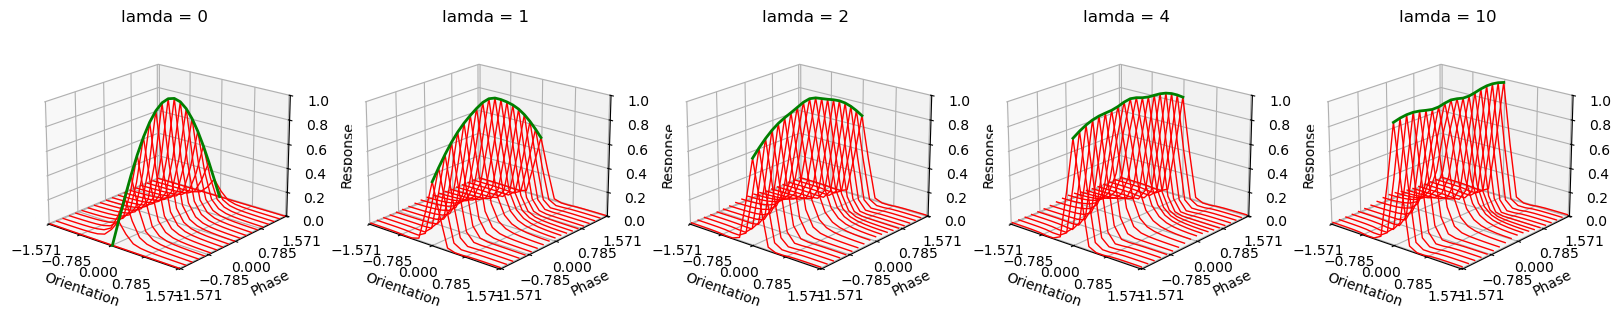

In [9]:
lamdas=np.array([0,1,2,4,10])
pa2m = 0.5; alpha = 0.2


fig = plt.figure(figsize=(20,5))
 # syntax for 3-D projection

for indLamda,lamda in enumerate(lamdas):
    fileLoad = 'data/_1Simple2ComplexStimPa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(alpha)+'.pckl'
    (orientations,phases,JAll) = utils.loadVar(fileLoad)
    
    
    ones = np.ones(len(orientations))
    phaseValues = np.zeros(len(phases))
    for indPhase,phase in enumerate(phases):
        JAll[indPhase] = fn.ReLU(JAll[indPhase])
        phaseValues[indPhase] = np.max(JAll[indPhase])
        
    
    normValue = np.max(phaseValues)   
    x = orientations
    indZero = np.argmin(np.abs(orientations)) #find orientation closest to zero
    ax = fig.add_subplot(1, len(lamdas), indLamda+1, projection='3d')

    ttl = 'lamda = '+str(lamda); plt.title(ttl)
    for indPhase,phase in enumerate(phases):
    
        z = JAll[indPhase]/normValue
        phaseValues[indPhase] = JAll[indPhase][indZero]/normValue
        y = ones*phase
        ax.plot3D(x, y, z, 'red',linewidth = 1)
        plt.xticks(np.array([-np.pi/2,-np.pi/4, 0, np.pi/4, np.pi/2]))
        plt.yticks(np.array([-np.pi/2,-np.pi/4, 0, np.pi/4, np.pi/2]))    
    
    x = np.zeros(len(orientations))
    ax.plot3D(x,phases,phaseValues,'g',linewidth = 2)
    # Customize the view angle so it's easier to see that the scatter points lie on the plane y=0
    ax.view_init(elev=20., azim=-50)


    # Make legend, set axes limits and labels
    ax.set_xlim(-1.6, 1.6)
    ax.set_ylim(-1.6, 1.6)
    ax.set_zlim(0, 1)
    ax.set_zticks(np.array([0, 0.2,0.4,0.6,0.8,1.0]))
    ax.set_xlabel('Orientation')
    ax.set_ylabel('Phase')
    ax.set_zlabel('Response')
    
#plt.savefig('data/thalamicResponse3D.eps', format='eps', dpi=1200)        
plt.show()

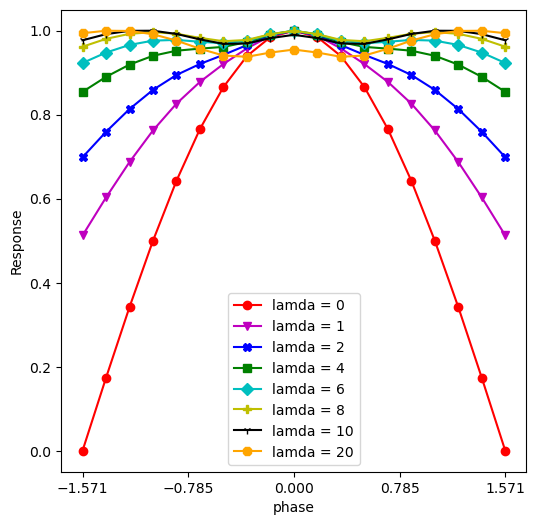

In [10]:
lamdas=np.array([0,1,2,4,6,8,10,20])

for ind,lamda in enumerate(lamdas):
    fileLoad = 'data/_1Simple2ComplexStimPa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(alpha)+'.pckl'
    (orientations,phases,JAll) = utils.loadVar(fileLoad)

    if ind == 0:
        maxPhaseResp = np.zeros((len(lamdas),len(phases)))
    
    for indPhase, phase in enumerate(phases): 
        maxPhaseResp[ind,indPhase] = np.max(fn.ReLU(JAll[indPhase]))
    
plt.figure(figsize=(6,6))  
colors = ['r','m','b','g','c','y','k','orange']
markers = ["o","v","X","s","D","P","1","8"]

lbl = 'lamda = '+str(lamda)
for ind,lamda in enumerate(lamdas):
    
    lbl = 'lamda = '+str(lamda)
    plt.plot(phases,maxPhaseResp[ind,:]/np.max(maxPhaseResp[ind,:]),colors[ind],marker = markers[ind],label=lbl)
    plt.xlabel('phase')
    plt.ylabel('Response')
    #plt.ylim((0,20))
    plt.xticks(np.array([-np.pi/2,-np.pi/4, 0, np.pi/4, np.pi/2]))
    plt.yticks(np.arange(0,1.1,0.2))
plt.legend()

#plt.savefig('data/thalamicPhaseResponseAll.eps', format='eps', dpi=1200)   
plt.show()

### Load the data and do analysis to produce Fig 2c

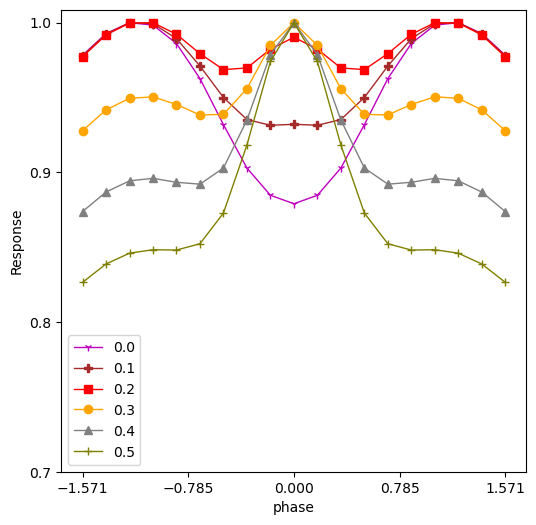

In [11]:
lamda = 10
alphas = np.array([0,0.1,0.2,0.3,0.4,0.5])

for ind,alpha in enumerate(alphas):
    if (alpha < 0.1)|(alpha > 0.9):
        fileLoad = 'data/_1Simple2ComplexStimPa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(int(alpha))+'.pckl'
    else:
        fileLoad = 'data/_1Simple2ComplexStimPa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(alpha)+'.pckl'  
    (orientations,phases,JAll) = utils.loadVar(fileLoad)
    
    if ind == 0:
        maxPhaseResp = np.zeros((len(alphas),len(phases)))
        
    for indPhase, phase in enumerate(phases): 
        maxPhaseResp[ind,indPhase] = np.max(fn.ReLU(JAll[indPhase]))
    
plt.figure(figsize=(6,6))  

colors = ['m','brown','r',"orange","gray",'olive']
markers = ["1","P","s","o","^","+"]

lbl = 'lamda = '+str(lamda)
for ind,alpha in enumerate(alphas):
    
    #lbl = 'alpha = '+str(alpha)
    lbl = str(alpha)
    plt.plot(phases,maxPhaseResp[ind,:]/np.max(maxPhaseResp[ind,:]),colors[ind],marker = markers[ind],linewidth = 1,label=lbl)
    plt.xlabel('phase')
    plt.ylabel('Response')
    #plt.ylim((0,20))
    plt.xticks(np.array([-np.pi/2,-np.pi/4, 0, np.pi/4, np.pi/2]))
    plt.yticks(np.arange(0.7,1.01,0.1))
plt.legend()

#plt.savefig('data/thalamicPhaseResponseAlpha.eps', format='eps', dpi=1200)    
plt.show()

### Load the data and do analysis to produce Fig 2d

the minimum modulation depth is 0.029362807397205187 for lamda 9.513656920021768 and alpha 0.2


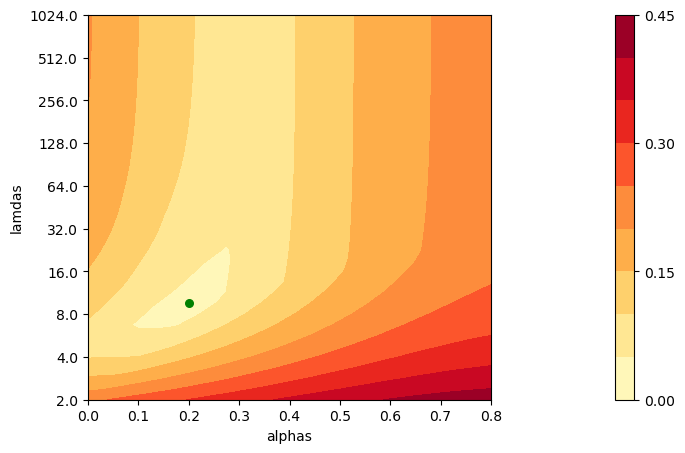

In [12]:
pa2m = 0.5
fileLoad = 'data/_1Simple2ComplexModulationDepthPa2m'+str(pa2m)+'.pckl'
(lamdas,alphas,phases,J3D) = utils.loadVar(fileLoad)

J3D = fn.ReLU(J3D)
            
modDepth = np.zeros((len(lamdas),len(alphas)))
for indL,lamda in enumerate(lamdas):
    for indA,alpha in enumerate(alphas):
                    
        phaseResp = J3D[indL,indA,:]
        modDepth[indL,indA] = (np.max(phaseResp)-np.min(phaseResp))/np.max(phaseResp)   

ind = np.unravel_index(np.argmin(modDepth, axis=None), modDepth.shape)
print(f'the minimum modulation depth is {modDepth[ind]} for lamda {lamdas[ind[0]]} and alpha {alphas[ind[1]]}')


lamdasLog = np.linspace(1,10,37)
X,Y = np.meshgrid(alphas,lamdasLog)
fig,ax = plt.subplots(figsize=(8,5))

im = ax.contourf(X,Y,modDepth,cmap ='YlOrRd')

v = np.array([0, 0.15, 0.30, 0.45])
Colorbar = fig.colorbar(im, orientation="vertical",pad=0.2)
Colorbar.set_ticks(v)

ind = np.unravel_index(np.argmin(modDepth, axis=None), modDepth.shape)
ax.scatter(alphas[ind[1]],lamdasLog[ind[0]],c='green', marker='o', s=30)


ax.set_xlabel('alphas')
ax.set_ylabel('lamdas')
ax.set_yticks(np.linspace(1,10,10))
ax.set_yticklabels(2**np.linspace(1,10,10))
ax.set_xlim(0,0.8)

#plt.savefig('data/ContourModDepth1.eps', format='eps', dpi=1200)    
plt.show()

### Load the data and do analysis to produce Supplementary Fig 4

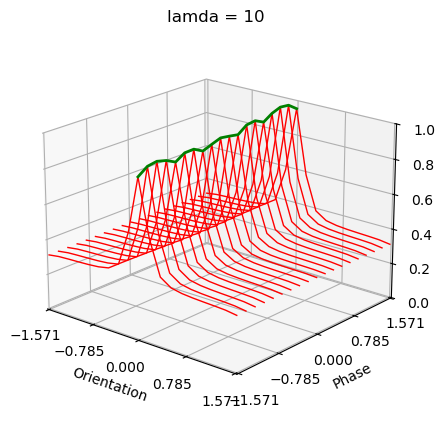

In [13]:
lamda= 10;pa2m = 0.5;alpha = 0.2

fig = plt.figure(figsize=(5,5))

fileLoad = 'data/_1HierarchicalStimPa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(alpha)+'.pckl'
(orientations,phases,JAll) = utils.loadVar(fileLoad)
ones = np.ones(len(orientations))

phaseValues = np.zeros(len(phases))
for indPhase,phase in enumerate(phases):
    JAll[indPhase] = fn.ReLU(JAll[indPhase])
    phaseValues[indPhase] = np.max(JAll[indPhase])
        
normValue = np.max(phaseValues)
    
x = orientations
indZero = np.argmin(np.abs(orientations)) #find orientation closest to zero
ax = fig.add_subplot(1, 1, 1, projection='3d')

ttl = 'lamda = '+str(lamda);plt.title(ttl)
for indPhase,phase in enumerate(phases):
    
        
    z = JAll[indPhase]/normValue
    phaseValues[indPhase] = JAll[indPhase][indZero]/normValue
    y = ones*phase
    ax.plot3D(x, y, z, 'red',linewidth = 1)
    plt.xticks(np.array([-np.pi/2,-np.pi/4, 0, np.pi/4, np.pi/2]))
    plt.yticks(np.array([-np.pi/2,-np.pi/4, 0, np.pi/4, np.pi/2]))    
    
x = np.zeros(len(orientations))
ax.plot3D(x,phases,phaseValues,'g',linewidth = 2)
# Customize the view angle so it's easier to see that the scatter points lie on the plane y=0
ax.view_init(elev=20., azim=-50)


# Make legend, set axes limits and labels
ax.set_xlim(-1.6, 1.6)
ax.set_ylim(-1.6, 1.6)
ax.set_zlim(0, 1)
ax.set_zticks(np.array([0, 0.2,0.4,0.6,0.8,1.0]))
ax.set_xlabel('Orientation')
ax.set_ylabel('Phase')
ax.set_zlabel('Response')
    
#plt.savefig('data/HierarchicalSupplementary.eps', format='eps', dpi=1200)        

plt.show()

### Load the data and do analysis to produce  Fig 3 

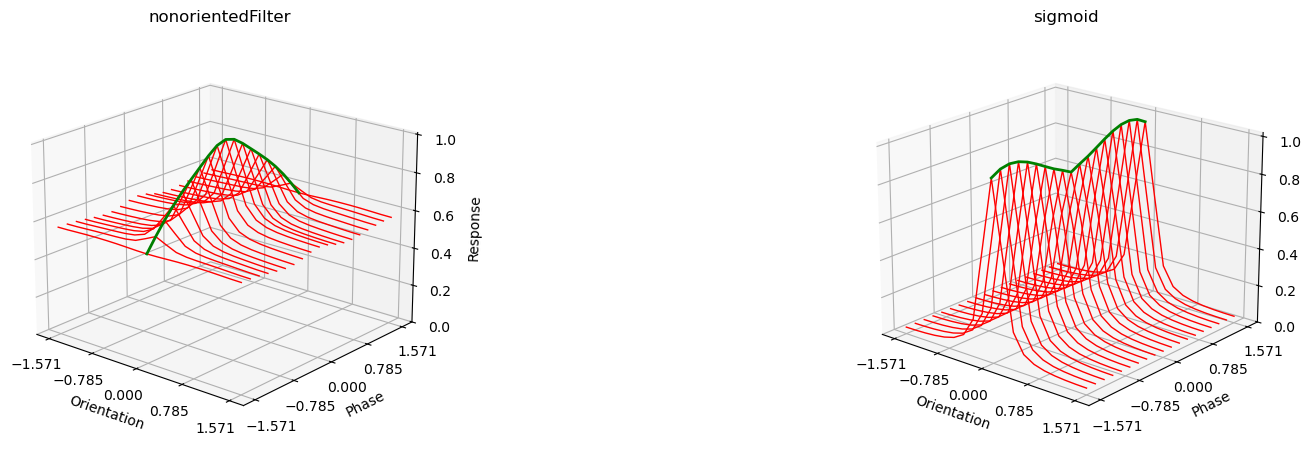

In [14]:
alpha = 0.2;lamda = 10;pa2m = 0.5

partsString = ['nonorientedFilter','sigmoid']

fig = plt.figure(figsize=(20,12))

for indParts,partString in enumerate(partsString):
    fileLoad = 'data/_1Simple2Complex'+partString+'StimPa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(alpha)+'.pckl' 
    (orientations,phases,JAll) = utils.loadVar(fileLoad)
    ones = np.ones(len(orientations))


    phaseValues = np.zeros(len(phases))
    for indPhase,phase in enumerate(phases):
        JAll[indPhase] = fn.ReLU(JAll[indPhase])
        phaseValues[indPhase] = np.max(JAll[indPhase])
    
    normValue = np.max(phaseValues)
    
    x = orientations
    indZero = np.argmin(np.abs(orientations)) #find orientation closest to zero
    ax = fig.add_subplot(2, 2, indParts+1, projection='3d')
    ttl = partString
    plt.title(ttl)
    for indPhase,phase in enumerate(phases):
    
        z = JAll[indPhase]/normValue
        phaseValues[indPhase] = JAll[indPhase][indZero]/normValue
        y = ones*phase
        ax.plot3D(x, y, z, 'red',linewidth = 1)
        plt.xticks(np.array([-np.pi/2,-np.pi/4, 0, np.pi/4, np.pi/2]))
        plt.yticks(np.array([-np.pi/2,-np.pi/4, 0, np.pi/4, np.pi/2]))    
    
    x = np.zeros(len(orientations))
    ax.plot3D(x,phases,phaseValues,'g',linewidth = 2)
    # Customize the view angle so it's easier to see that the scatter points lie on the plane y=0
    ax.view_init(elev=20., azim=-50)


    # Make legend, set axes limits and labels
    ax.set_zticks(np.array([0, 0.2,0.4,0.6,0.8,1.0]))
    ax.set_xlabel('Orientation')
    ax.set_ylabel('Phase')
    ax.set_zlabel('Response')
    
#plt.savefig('data/counterExamples.eps', format='eps', dpi=1200)        

plt.show()

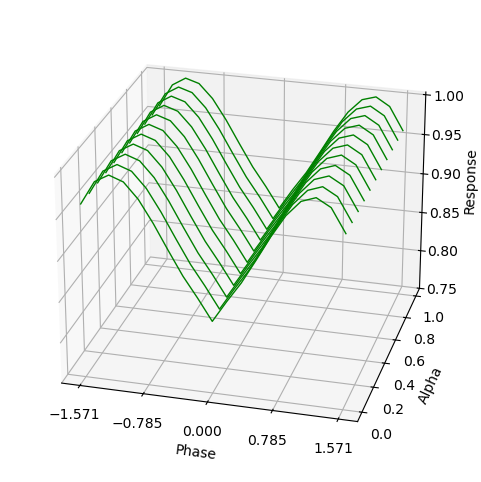

In [15]:
lamda = 10
alphas = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
partString = 'sigmoid'
    
maxPhaseResp = np.zeros((len(alphas),len(phases)))
for ind,alpha in enumerate(alphas):
    if (alpha < 0.1)|(alpha > 0.9):
        fileLoad = 'data/_1Simple2Complex'+partString+'StimPa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(alpha)+'.pckl' 
    else:
        fileLoad = 'data/_1Simple2Complex'+partString+'StimPa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(alpha)+'.pckl' 
    
    (orientations,phases,JAll) = utils.loadVar(fileLoad)

    for indPhase, phase in enumerate(phases): 
        JAll[indPhase] = fn.ReLU(JAll[indPhase])
        maxPhaseResp[ind,indPhase] = np.max(JAll[indPhase])
    
colors = ['r','m','b','g','c','y','pink','olive',"brown","gray",'orange']
markers = ["8","v","X","s","D","P","1","+","o","^","+"]

ones = np.ones(len(phases));x = phases

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for ind,alpha in enumerate(alphas):
    
    z = maxPhaseResp[ind,:]/np.max(maxPhaseResp[ind,:])
    y = ones*alpha
    ax.plot3D(x, y, z, color = 'g',linewidth = 1)
    plt.xticks(np.array([-np.pi/2,-np.pi/4, 0, np.pi/4, np.pi/2]))
    plt.yticks(np.arange(0,1.1,0.2)) 


ax.set_zticks(np.array([0.75,0.8,0.85,0.9,0.95,1.0]))
ax.set_xlabel('Phase')
ax.set_ylabel('Alpha')
ax.set_zlabel('Response')

ax.view_init(elev=25., azim=-75)



#plt.savefig('data/counterExampleAlpha.eps', format='eps', dpi=1200)    
plt.show()